In [4]:
#from astropy.io import fits 
#from astropy.table import Table

#imgl=fits.getdata(filename)
#headl=fits.getheader(filename)

In [1]:
from astropy.utils.data import download_file
from astropy.io import fits

image_file=download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)



In [2]:
fits.info(image_file)

Filename: /home/csat8911/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [5]:
image_data = fits.getdata(image_file, ext=0)
image_data.shape

(893, 891)

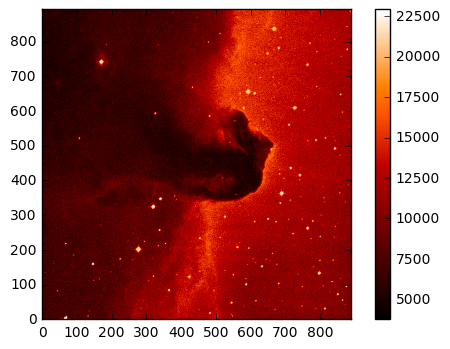

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(image_data, cmap='gist_heat', origin='lower')
plt.colorbar();

In [15]:
#Another way to do it

hdulist = fits.open(image_file)
hdulist.info()

Filename: /home/csat8911/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [16]:
header = hdulist['PRIMARY'].header
data = hdulist['PRIMARY'].data
hdulist.close()

In [17]:
print(repr(header[:10]))

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               


In [19]:
print(header[:10].keys())
print(header[:10].values())
print(header['ORIGIN'])
print (header.comments['ORIGIN'])

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'DATE', 'ORIGIN', 'SURVEY', 'REGION']
[True, 16, 2, 891, 893, True, '2014-01-09', 'STScI/MAST', 'SERC-ER', 'ER768']
STScI/MAST
GSSS: STScI Digitized Sky Survey


In [20]:
from astropy.wcs import WCS
wcs= WCS(header)
print wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 85.599416666666656  -4.9466388888888888  
CRPIX : -716.333144294269  -8444.6494669822605  
PC1_1 PC1_2  : 0.015029018460682027  -9.6373577765719806e-06  
PC2_1 PC2_2  : 1.0548917307845708e-05  0.015000473845055023  
CDELT : -0.018654788242111486  0.018654788242111486  
NAXIS : 891  893


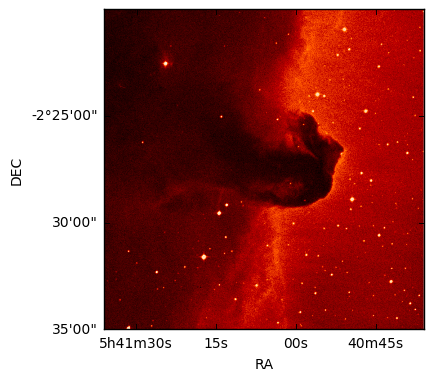

In [21]:
fig = plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.imshow(data,cmap='gist_heat', origin='lower' )
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');


In [26]:
from astropy.coordinates import SkyCoord
c0=SkyCoord('5h41m00s','-2d27m00s', frame='icrs')
print c0

<SkyCoord (ICRS): (ra, dec) in deg
    ( 85.25, -2.45)>


In [29]:
center=wcs.all_world2pix(c0.ra,c0.dec,0)
print(center)

[array(534.1235215073059), array(475.5504697035576)]


In [30]:
from astropy.nddata import Cutout2D

size=400
cutout=Cutout2D(data, center, size,wcs=wcs)

print cutout.bbox_original

((276, 675), (334, 733))


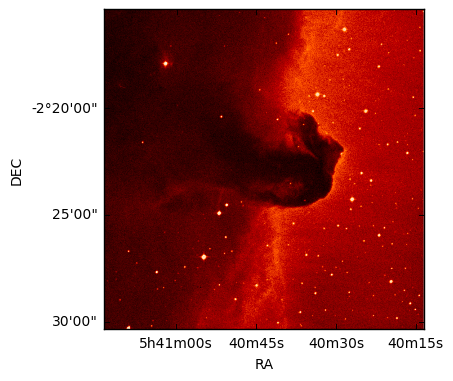

In [31]:
fig = plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=cutout.wcs)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.imshow(data,cmap='gist_heat', origin='lower' )
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');


In [35]:
cheader=cutout.wcs.to_header()
primaryhdu= fits.PrimaryHDU(cutout.data,cheader)
hdulist = fits.HDUList([primaryhdu])
hdulist.writeto('horse.fits',overwrite=True)

In [36]:
hdulist = fits.open(image_file)
hdulist.info()

Filename: /home/csat8911/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     161   (891, 893)   int16   
  1  er.mask     TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [37]:
from astropy.table import Table
t= Table.read(image_file, hdu=1)
t[:10].show_in_notebook()

idx,XI,ETA,XI_CORR,ETA_CORR
,DEGREES,DEGREES,ARCSEC,ARCSEC
0,-3.12,-3.12,0.09,0.04
1,-2.96,-3.12,0.02,0.07
2,-2.8,-3.12,-0.07,0.15
3,-2.64,-3.12,-0.17,0.25
4,-2.48,-3.12,-0.29,0.26
5,-2.32,-3.12,-0.38,0.25
6,-2.16,-3.12,-0.42,0.15
7,-2.0,-3.12,-0.48,0.06
8,-1.84,-3.12,-0.47,-0.01


In [41]:
import numpy as np
t['ETA'].format='4.1f'
print (t[:10])

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -3.12    -3.1    0.09     0.04
  -2.96    -3.1    0.02     0.07
   -2.8    -3.1   -0.07     0.15
  -2.64    -3.1   -0.17     0.25
  -2.48    -3.1   -0.29     0.26
  -2.32    -3.1   -0.38     0.25
  -2.16    -3.1   -0.42     0.15
   -2.0    -3.1   -0.48     0.06
  -1.84    -3.1   -0.47    -0.01
  -1.68    -3.1   -0.47    -0.12


In [44]:
import numpy as np
print t[np.where(t['ETA_CORR'] > 0.8)]

   XI     ETA   XI_CORR ETA_CORR
DEGREES DEGREES  ARCSEC  ARCSEC 
------- ------- ------- --------
  -0.24     3.0   -0.11     0.81
  -0.08     3.0   -0.06     0.86
   0.08     3.0    0.05     0.88
   0.24     3.0    0.13     0.82
  -0.24     3.1   -0.12     0.85
  -0.08     3.1   -0.07      0.9
   0.08     3.1    0.07     0.91
   0.24     3.1     0.2      0.9
    0.4     3.1    0.23     0.83


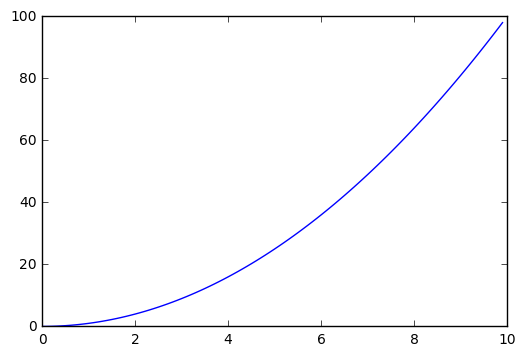

In [47]:
a= np.arange(0,10,0.1)
b= a**2
t1 = Table([a,b], names=('a','b'))
plt.plot(t1['a'], t1['b']);

In [48]:
t1.show_in_browser

<bound method Table.show_in_browser of <Table length=100>
   a       b   
float64 float64
------- -------
    0.0     0.0
    0.1    0.01
    0.2    0.04
    0.3    0.09
    0.4    0.16
    0.5    0.25
    0.6    0.36
    0.7    0.49
    0.8    0.64
    0.9    0.81
    ...     ...
    9.0    81.0
    9.1   82.81
    9.2   84.64
    9.3   86.49
    9.4   88.36
    9.5   90.25
    9.6   92.16
    9.7   94.09
    9.8   96.04
    9.9   98.01>

In [ ]:
#Saving a table
t1.write(filename.fits)
t1.write(filename.txt, format='ascii.tab')
t1.write(filename.tex, format='ascii.latex')

In [52]:
from astropy import units as u 
val= 30.0* u.cm
print val.to(u.km)

0.0003 km


In [53]:
val1= 10*u.km
val2=100. *u.m

print (val1/val2.decompose())


0.1 km / m


In [55]:
from astropy import constants as c 
mass=(3.2E13* u.kg).to(c.M_sun)
print mass

1.60876778443e-17 1.9891e+30 kg


In [56]:
print c.c.cgs

29979245800.0 cm / s


## Astronomical Query

In [57]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords 
pos =coords.SkyCoord('13h10m27.46s +18d26m17.4s', frame='icrs')
xid= SDSS.query_region(pos,spectro=True)
xid

/home/csat8911/anaconda2/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,str4
197.614455643,18.4381688537,1237668296598749280,5314,301,1,136,0.0124487,2618,54506,310,2947691243863304192,26,SDSS


In [58]:
sp= SDSS.get_spectra(matches=xid)
im= SDSS.get_images(matches=xid, band='r')

In [59]:
print len(sp), len(im)

1 1


In [61]:
template = SDSS.get_spectral_template('qso')
print len(template)

1


In [75]:
hdulist=im[0]
hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      96   (2048, 1489)   float32   
  1              ImageHDU         6   (2048,)   float32   
  2              BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3              BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


((1489, 2048), 'float32')


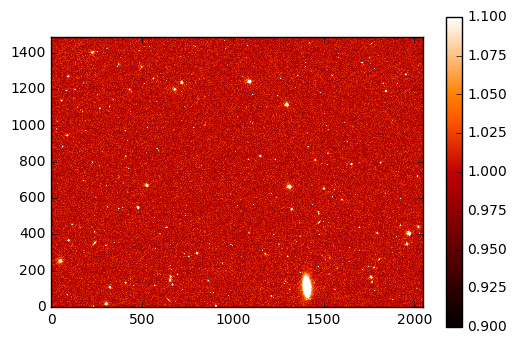

In [76]:
header = hdulist[0], header
data= hdulist[0].data
print (data.shape, data.dtype.name)

plt.imshow(np.sqrt(data+1.), origin='lower',cmap='gist_heat', vmax=1.1, vmin=0.9)
plt.colorbar();

((1489, 2048), 'float32')


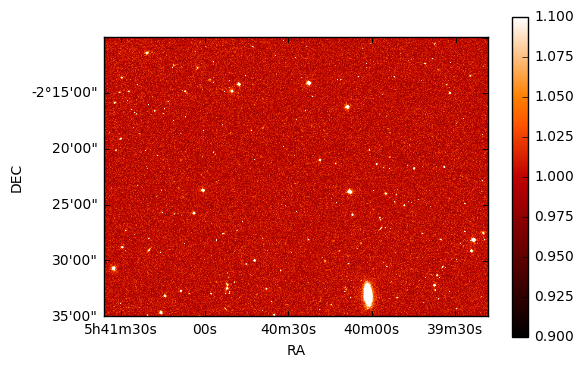

In [77]:
header = hdulist[0], header
data= hdulist[0].data
print (data.shape, data.dtype.name)

fig = plt.figure()
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.imshow(data,cmap='gist_heat', origin='lower' )
ra=ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec=ax.coords[1]
dec.set_major_formatter('dd:mm:ss');

plt.imshow(np.sqrt(data+1.), origin='lower',cmap='gist_heat', vmax=1.1, vmin=0.9)
plt.colorbar();

In [91]:
c0=SkyCoord('13h10m27.46s +18d26m17.4s', frame='icrs')
print c0
wcs=WCS(header)
center= wcs.all_world2pix(c0.ra,c0.dec,0)
size=400 
cutout=Cutout2D(data, center, size,wcs=wcs)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 197.61441667,  18.43816667)>


AttributeError: 'tuple' object has no attribute 'keys'

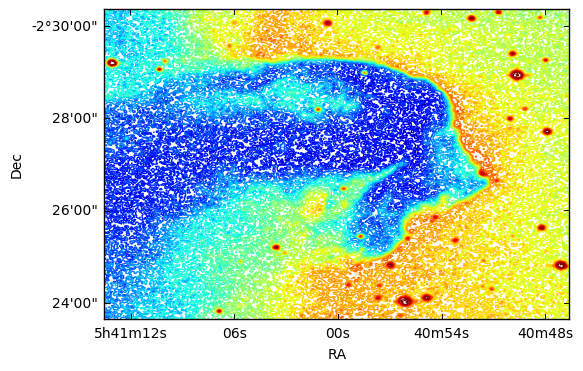

In [86]:
ax= plt.subplot(projection=cutout.wcs)
ra= ax.coords[0]
ra.set_major_formatter('hh:mm:ss')
dec = ax.coords[1]
dec.set_major_formatter('dd:mm:ss')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.imshow(np.sqrt(cutout.data+1.),cmap='gist_heat', vmax=1.1, vmin=0.9, aspect='auto')

a= np.sqrt(cutout.data+1.)
mina=np.min(a)
maxa=np.max(a)
levels=np.arange(mina,maxa,(maxa-mina)/20.)
labels= [item.get_text() for item in ax.get_xticklabels()]
ax.contour(a,levels,color='cyan');

                          

In [ ]:
from matplotlib.figure import Figure 
